In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

In [168]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2019,9,1)
df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,206.490005
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,204.160004
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005


In [169]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail()

Date
2019-08-26    198.086917
2019-08-27    198.186503
2019-08-28    198.286788
2019-08-29    198.391109
2019-08-30    198.498685
Name: Adj Close, dtype: float64

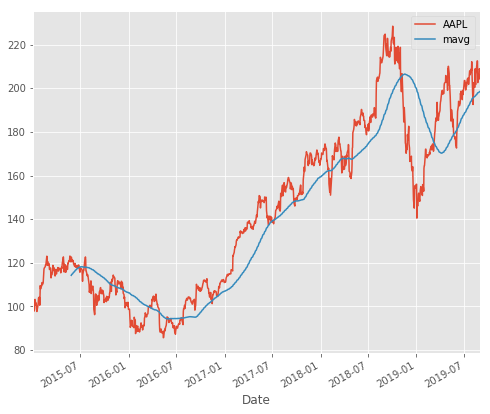

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
mpl.rc('figure', figsize=(8,7))
mpl.__version__

style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

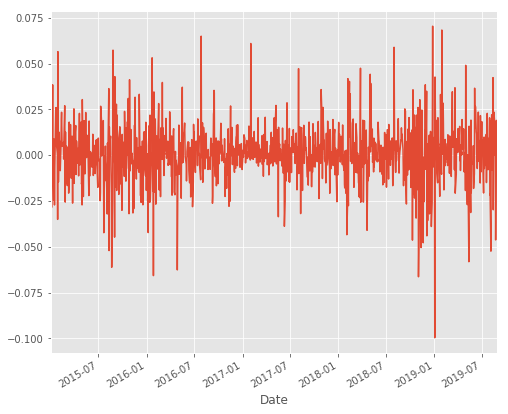

In [171]:
rets = close_px/close_px.shift(1) - 1
rets.plot(label='Return')

In [172]:
dfreg = df.loc[:, ['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High']-df['Low'])/df['Close'] *100
dfreg['PCT_change'] = (df['Close']-df['Open'])/df['Open']*100
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2015-01-02,100.755898,53204600.0,3.740971,-1.849356
2015-01-05,97.917427,64285500.0,3.049410,-1.883831
2015-01-06,97.926666,65797100.0,2.635049,-0.262811
2015-01-07,99.299805,40105900.0,1.392111,0.513063
2015-01-08,103.115128,59364500.0,3.083390,2.435225
2015-01-09,103.225708,53699500.0,2.714044,-0.585778
2015-01-12,100.682159,49650800.0,3.505716,-2.975132
2015-01-13,101.576080,67091900.0,3.529304,-1.085883
2015-01-14,101.189041,48956600.0,1.812384,0.696994


In [0]:
import math
dfreg.fillna(value = -9999, inplace=True)

forecast_out = int(math.ceil(0.01*len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)


In [0]:
import numpy as np
from sklearn import preprocessing
X = np.array(dfreg.drop(['label'], 1))
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [177]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [178]:
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

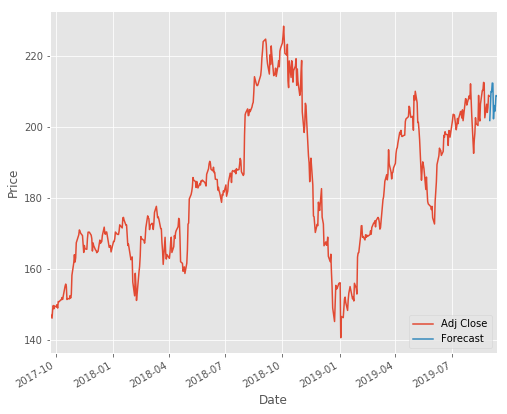

In [180]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

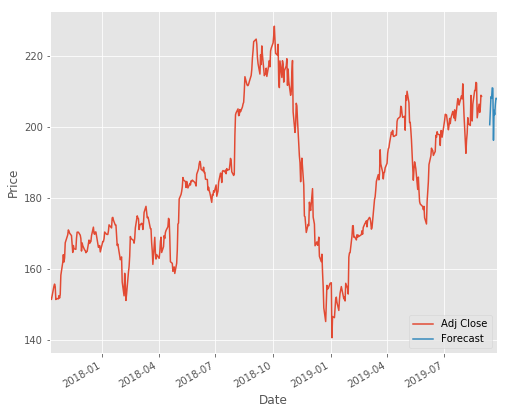

In [181]:
forecast_set = clfpoly2.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

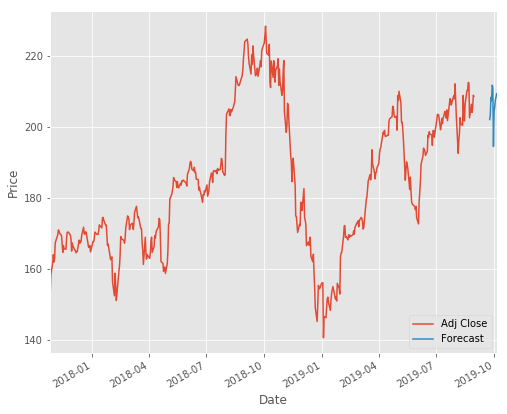

In [185]:
forecast_set = clfpoly3.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

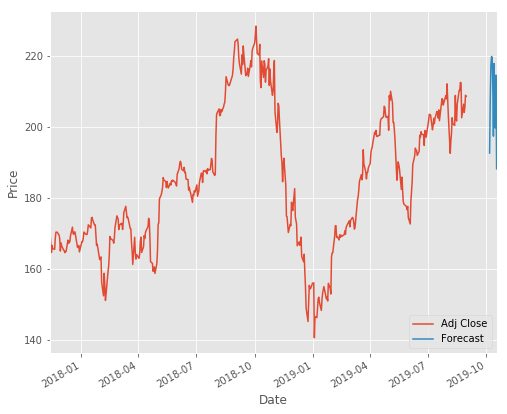

In [186]:

forecast_set = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

0.9093922035558379